# RFC: Human Resources Analytics: Why are our best and most experienced employees leaving prematurely?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statistics
import statsmodels
from statsmodels.sandbox.stats.runs import mcnemar
from statsmodels.sandbox.stats.runs import stats

In [2]:
hr_stats = pd.read_csv('/Users/cappsjr/Downloads/HR_comma_sep.csv')
hr_stats.rename(index=str, columns={'satisfaction_level': 'Satisfaction Level', 
                                    'last_evaluation': 'Last Evaluation Score', 
                                    'number_project': 'Number of Projects Completed', 
                                   'average_montly_hours': 'Average Monthly Hours', 
                                   'time_spend_company': 'Years with Company', 
                                   'Work_accident': 'Work Accident', 
                                   'left': 'Left', 
                                   'promotion_last_5years': 'Promoted in Last 5 Years',
                                   'sales': 'Department',
                                   'salary': 'Salary'})

,Satisfaction Level,Last Evaluation Score,Number of Projects Completed,Average Monthly Hours,Years with Company,Work Accident,Left,Promoted in Last 5 Years,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# The Dataset

In [3]:
#information about the data
hr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


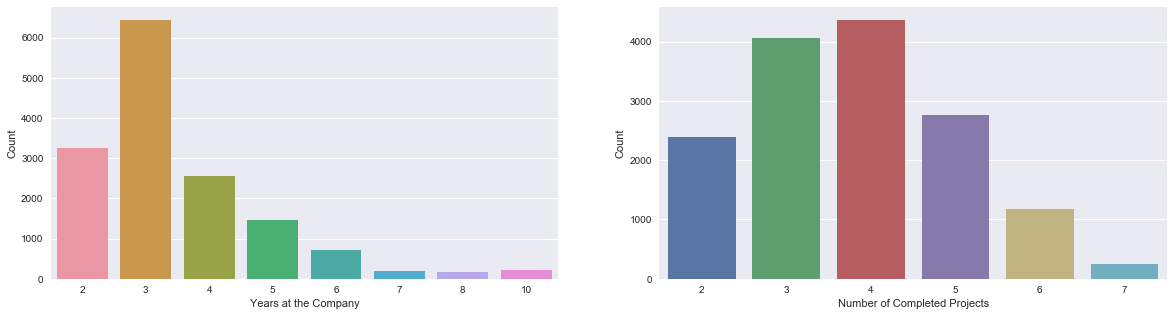

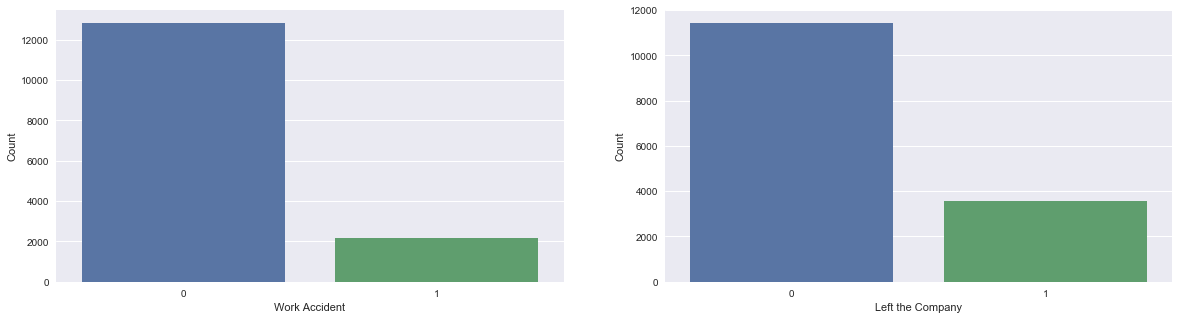

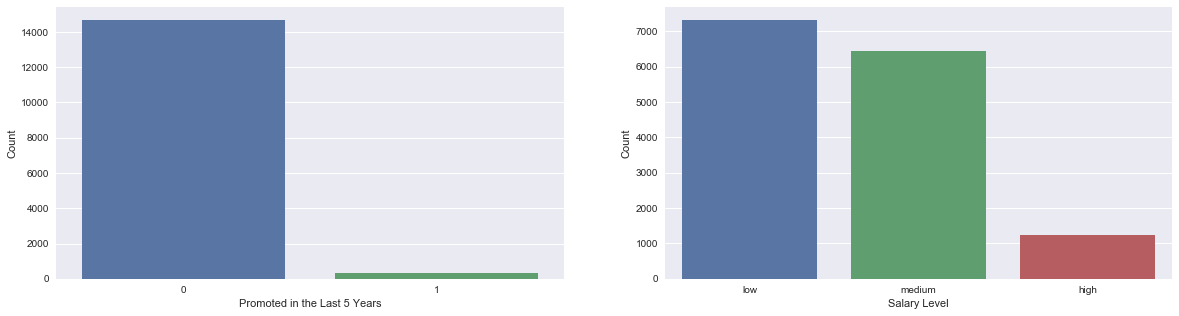

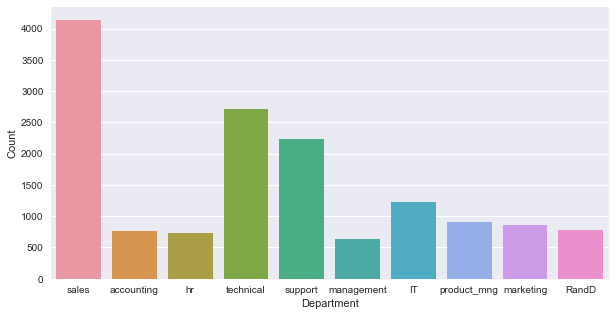

In [5]:
#Employee counts and visualizations for the categorical variables included in the dataset

plt.figure(figsize=(20,5))
#Years spent at the company
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company',data = hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Count')

#Number of projects completed
plt.subplot(1, 2, 2)
sns.countplot(x='number_project',data = hr_stats)
plt.xlabel('Number of Completed Projects')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(20,5))
#Whether or not involved in a work accident 
plt.subplot(1, 2, 1)
sns.countplot(x='Work_accident',data = hr_stats)
plt.xlabel('Work Accident')
plt.ylabel('Count')

#Whether or not they left the company
plt.subplot(1, 2, 2)
sns.countplot(x='left',data = hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(20,5))
#Whether or not they were promoted within the last five years
plt.subplot(1, 2, 1)
sns.countplot(x='promotion_last_5years',data = hr_stats)
plt.xlabel('Promoted in the Last 5 Years')
plt.ylabel('Count')

#Employee salary level
plt.subplot(1, 2, 2)
sns.countplot(x='salary',data = hr_stats)
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

#Department the employee worked in
plt.figure(figsize=(10,5))
sns.countplot(x='sales',data = hr_stats)
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# The Problem:  Employee Churn

The problem that will be addressed with this experiment is employee churn.  Employee churn is the overall turnover in a company’s staff during a given period of time as old employees leave and new employees are hired.  There will be inevitable employee turnover, but a high churn rate is costly to a company because recruitment, hiring, and training all comes with a price, and it will also take time for a new employee to be as productive as an existing employee.  Furthermore, an unusually high employee churn rate may indicate other problems that exist within the organization, such as unreasonable expectations, uncompetitive compensation, low morale, poor management, or ineffective human resources management.  The data examined shows an employment churn rate of 23.8%, nearly a quarter of the employees represented in the dataset.  The employee churn rate is usually measured by calculating the percentage of employees who leave the company during a given period of time.  However, the information in the dataset does not define any period of time, so in this case there there is an assumption that the dataset represents a given period of time, and the churn rate will be measured by calculating the percentage of employees who have left within that time period.  The data does provide information about how long the people who left the company stayed.  Of the 3,571 people who left the company, 53 people left after two years (1.48%), 1586 left after three years (44.41%), 890 people left after four years (24.92%), 833 left after five years (23.33%), 209 people left after six year (5.85%), and not one in the dataset that stayed longer than six years left the company.

Before attempting to develop a solution to the problem of employee churn, it is helpful to examine and compare the characteristics of the employees who left the company and the employees who stayed with the company.  When one looks at the average employee who left compared to the average employee who did not stay (using the mean) several important data points pop out: satisfaction level, average monthly hours, years spent at the company, work accidents, and promotions in the last five years. Employees who left had a lower satisfaction level (0.44 compared to 0.67), spent more time working per month (207.42 hours compared to 199.06 hours), and had a lower rate of promotion (0.005 compared to 0.026)  than employees who stayed with the company.  Employees who left the company tended to stay with the company for longer than those who stayed (average 3.88 years at the company compared to 3.38 years).  The fewer years spent at the company by those who stayed is explained by the large number of relatively new employees who still work at the company (8,048, or 70.42%, of the 11,428 employees who stayed with the company have worked there for three years or less).  It is interesting to note that employees who stayed were more likely to involved in a work accident compared to those employees who left.  There is little evidence or data to explain why this might be the case.  However, there is more than that to the story because the averages do not address salary level or department in which the employee worked.  60.82% of employees who left had a low salary compared to 45.12% of employees who stayed, %36.88 of employees who left had a medium salary compared to 44.88% of employees who stayed, and 2.30% of employees who left had a high salary compared to 10.11% of employees who stayed. 

**Need to talk about the relationship between department and whether the employee stayed or left

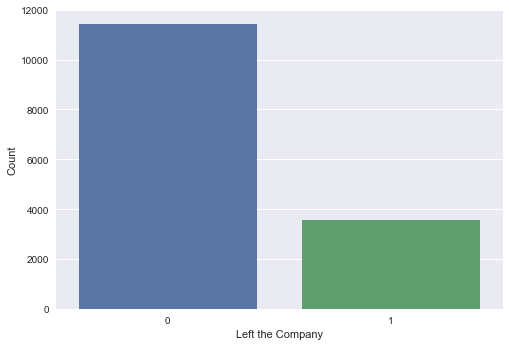

Number of Employees That Left: 3571
Total Number of Employees in the Dataset: 14999
Proportion of Employees Who Left: % 23.80825388359224


In [6]:
#the total number of employees who left and the proportion of employees who left
sns.countplot(x='left', data=hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Count')
plt.show()

num_left = len(hr_stats[hr_stats['left']==1])
num_total = len(hr_stats)
print("Number of Employees That Left:", num_left)
print("Total Number of Employees in the Dataset:", num_total)
print("Proportion of Employees Who Left:", '%',(num_left/num_total) * 100,)

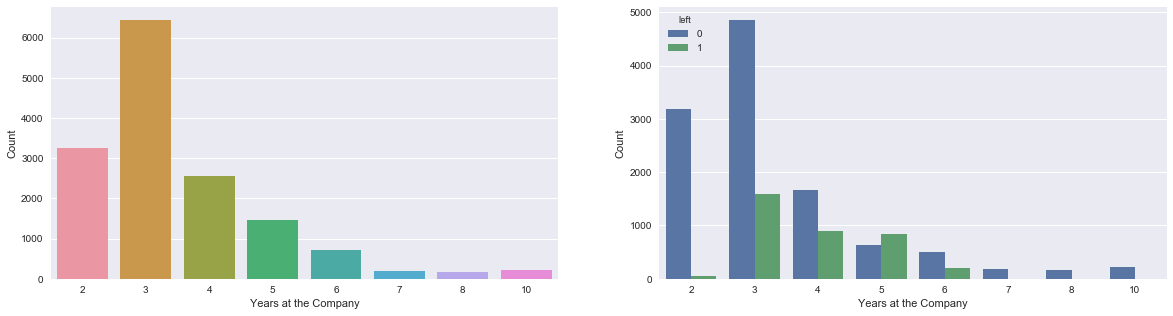

Avg. # of Years Spent at the Company: 3.498233215547703
Employees Who Stayed
# of 2-Year Employees Who Stayed: 3191        Proportion:  27.922646132306618 %
# of 3-Year Employees Who Stayed: 4857        Proportion:  42.50087504375219 %
# of 4-Year Employees Who Stayed: 1667        Proportion:  14.58697934896745 %
# of 5-Year Employees Who Stayed: 640         Proportion:  5.6002800140007 %
# of 6-Year Employees Who Stayed: 509         Proportion:  4.4539726986349315 %
# of 7-Year Employees Who Stayed: 188
# of 8-Year Employees Who Stayed: 162
# of 9-Year Employees Who Stayed: 0
# of 10-Year Employees Who Stayed: 214
Employees Who Left
# of Employees Who Left After 2 Years: 53     Proportion:  1.4841781013721647 %
# of Employees Who Left After 3 Years: 1586   Proportion:  44.41332959955195 %
# of Employees Who Left After 4 Years: 890    Proportion:  24.922990758891068 %
# of Employees Who Left After 5 Years: 833    Proportion:  23.326799215905908 %
# of Employees Who Left After 6 Years: 

In [17]:
#Graphic and information showing how long employees are staying at the company
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company', data=hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='time_spend_company', data=hr_stats, hue='left')
plt.xlabel('Years at the Company')
plt.ylabel('Count')
plt.show()

print('Avg. # of Years Spent at the Company:', hr_stats['time_spend_company'].mean())


two_years_stay = len(hr_stats[(hr_stats['time_spend_company']==2) & (hr_stats['left']==0)])
three_years_stay = len(hr_stats[(hr_stats['time_spend_company']==3) & (hr_stats['left']==0)])
four_years_stay = len(hr_stats[(hr_stats['time_spend_company']==4) & (hr_stats['left']==0)])
five_years_stay = len(hr_stats[(hr_stats['time_spend_company']==5) & (hr_stats['left']==0)])
six_years_stay = len(hr_stats[(hr_stats['time_spend_company']==6) & (hr_stats['left']==0)])
seven_years_stay = len(hr_stats[(hr_stats['time_spend_company']==7) & (hr_stats['left']==0)])
eight_years_stay = len(hr_stats[(hr_stats['time_spend_company']==8) & (hr_stats['left']==0)])
nine_years_stay = len(hr_stats[(hr_stats['time_spend_company']==9) & (hr_stats['left']==0)])
ten_years_stay = len(hr_stats[(hr_stats['time_spend_company']==10) & (hr_stats['left']==0)])

print('Employees Who Stayed')
print('# of 2-Year Employees Who Stayed:', two_years_stay, '       Proportion: ', two_years_stay/11428 * 100, '%')
print('# of 3-Year Employees Who Stayed:', three_years_stay, '       Proportion: ', three_years_stay/11428 * 100, '%')
print('# of 4-Year Employees Who Stayed:', four_years_stay, '       Proportion: ', four_years_stay/11428 * 100, '%')
print('# of 5-Year Employees Who Stayed:', five_years_stay, '        Proportion: ', five_years_stay/11428 * 100, '%')
print('# of 6-Year Employees Who Stayed:', six_years_stay, '        Proportion: ', six_years_stay/11428 * 100, '%')
print('# of 7-Year Employees Who Stayed:', seven_years_stay)
print('# of 8-Year Employees Who Stayed:', eight_years_stay)
print('# of 9-Year Employees Who Stayed:', nine_years_stay)
print('# of 10-Year Employees Who Stayed:', ten_years_stay)

two_years_left = len(hr_stats[(hr_stats['time_spend_company']==2) & (hr_stats['left']==1)])
three_years_left = len(hr_stats[(hr_stats['time_spend_company']==3) & (hr_stats['left']==1)])
four_years_left = len(hr_stats[(hr_stats['time_spend_company']==4) & (hr_stats['left']==1)])
five_years_left = len(hr_stats[(hr_stats['time_spend_company']==5) & (hr_stats['left']==1)])
six_years_left = len(hr_stats[(hr_stats['time_spend_company']==6) & (hr_stats['left']==1)])
seven_years_left = len(hr_stats[(hr_stats['time_spend_company']==7) & (hr_stats['left']==1)])
eight_years_left = len(hr_stats[(hr_stats['time_spend_company']==8) & (hr_stats['left']==1)])
nine_years_left = len(hr_stats[(hr_stats['time_spend_company']==9) & (hr_stats['left']==1)])
ten_years_left = len(hr_stats[(hr_stats['time_spend_company']==10) & (hr_stats['left']==1)])

print('Employees Who Left')
print('# of Employees Who Left After 2 Years:', two_years_left, '    Proportion: ', two_years_left/3571 * 100, '%')
print('# of Employees Who Left After 3 Years:', three_years_left, '  Proportion: ', three_years_left/3571 * 100, '%')
print('# of Employees Who Left After 4 Years:', four_years_left, '   Proportion: ', four_years_left/3571 * 100, '%')
print('# of Employees Who Left After 5 Years:', five_years_left, '   Proportion: ', five_years_left/3571 * 100, '%')
print('# of Employees Who Left After 6 Years:', six_years_left, '   Proportion: ', six_years_left/3571 * 100, '%')
print('# of Employees Who Left After 7 Years:', seven_years_left)
print('# of Employees Who Left After 8 Years:', eight_years_left)
print('# of Employees Who Left After 9 Years:', nine_years_left)
print('# of Employees Who Left After 10 Years:', ten_years_left)

print('Avg. Years Spent at the Company for Employees Who Left & Stayed (0=Stay, 1=Left): ', 
      hr_stats.groupby('left')['time_spend_company'].mean())

In [7]:
#Need to examine why employees left and the characteristics of the employees who left and the employees who 
#did not leave.

#Mean satisfaction level for those employees who left the company
sat_level_left = hr_stats[(hr_stats['left']==1) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Left the Company')
print(sat_level_left.mean())

#Mean satisfaction level for those employees who did not leave the company
sat_level_stay = hr_stats[(hr_stats['left']==0) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Did NOT Leave the Company')
print(sat_level_stay.mean())

Averages (Mean): Left the Company
satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64
Averages (Mean): Did NOT Leave the Company
satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64


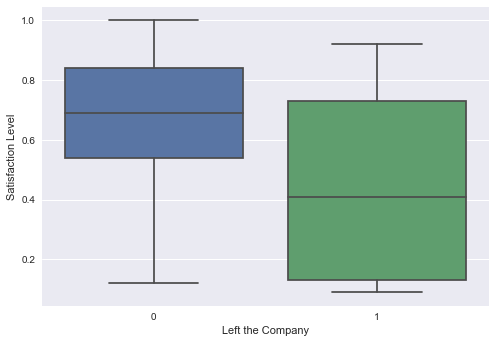

Avg. Satisfaction Level for Employees Who Left & Stayed (0=Stay, 1=Left):  left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


In [13]:
#Looking at the relationship between satisfation level, salary, and whether or not the employee left
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Satisfaction Level')
plt.show()

#Avg. satisfaction level of those who were promoted and those who were not promoted in the last 5 years
print('Avg. Satisfaction Level for Employees Who Left & Stayed (0=Stay, 1=Left): ', 
      hr_stats.groupby('left')['satisfaction_level'].mean())

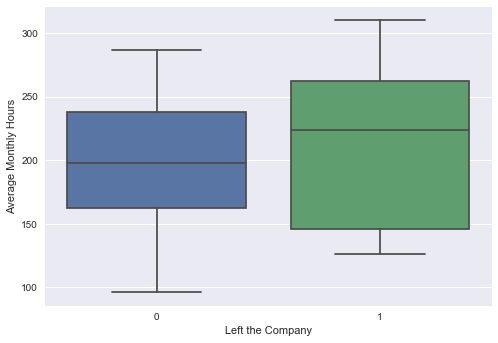

Avg. Monthly for Employees Who Left & Stayed (0=Stay, 1=Left):  left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64


In [15]:
#Showing the relationship between the average monthly hours employees worked and whether or not they left the 
#company
sns.boxplot(x='left', y='average_montly_hours', data=hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Average Monthly Hours')
plt.show()

print('Avg. Monthly for Employees Who Left & Stayed (0=Stay, 1=Left): ', 
      hr_stats.groupby('left')['average_montly_hours'].mean())

Work Accident Rate for Those Who Left and Stayed (0=Stay, 1=Left):  left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64


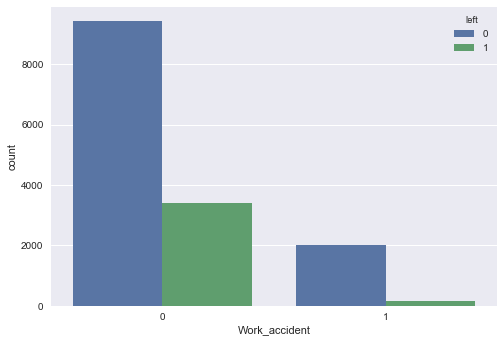

In [21]:
sns.countplot(x='Work_accident', data=hr_stats, hue='left')
print('Work Accident Rate for Those Who Left and Stayed (0=Stay, 1=Left): ', 
      hr_stats.groupby('left')['Work_accident'].mean())

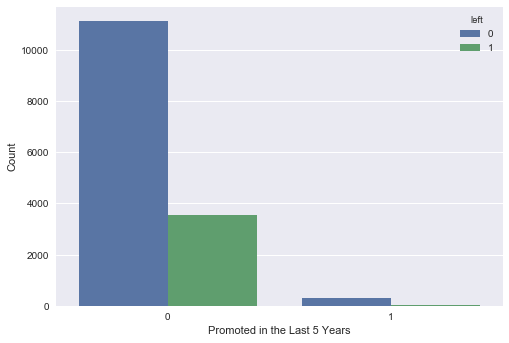

Promotion Rate for Those Who Left and Stayed (0=Stay, 1=Left):  left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64


In [20]:
#Looking at the relationship between the amount of time spent at the company, whether or not the employee
#received a promotion in the last five years, and whether or not the employee left
sns.countplot(x='promotion_last_5years',data = hr_stats, hue='left')
plt.xlabel('Promoted in the Last 5 Years')
plt.ylabel('Count')
plt.show()

#Avg satisfaction level of those who left and those who stayed
print('Promotion Rate for Those Who Left and Stayed (0=Stay, 1=Left): ', 
      hr_stats.groupby('left')['promotion_last_5years'].mean())

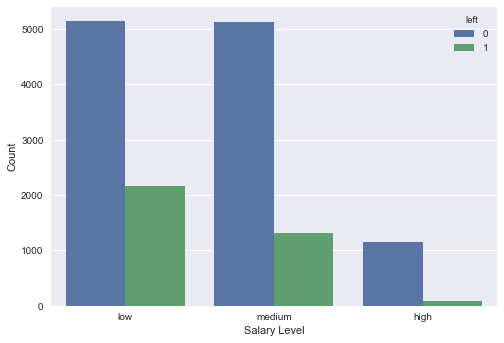

Employees Who Left
# of Employees Who Left with Low Salary: 2172        Proportion: % 60.82329879585551
# of Employees Who Left with Medium Salary: 1317     Proportion: % 36.88042565107813
# of Employees Who Left with High Salary: 82         Proportion: % 2.2962755530663683
Employees Who Stayed
# of Employees Who Stayed with Low Salary: 5144      Proportion: % 45.01225061253062
# of Employees Who Stayed with Medium Salary: 5129   Proportion: % 44.88099404970248
# of Employees Who Stayed with High Salary: 1155     Proportion: % 10.106755337766888


In [23]:
#Number and proportion of employees who left at each salary level
sns.countplot(x='salary',data = hr_stats, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

print('Employees Who Left')
print('# of Employees Who Left with Low Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='low')]), 
      '       Proportion: %', 2172/3571*100)
print('# of Employees Who Left with Medium Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='medium')]), 
      '    Proportion: %', 1317/3571*100)
print('# of Employees Who Left with High Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='high')]), 
      '        Proportion: %', 82/3571*100)

#Number of employees who stayed at each salary level
print('Employees Who Stayed')
print('# of Employees Who Stayed with Low Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='low')]), 
      '     Proportion: %', 5144/11428*100)
print('# of Employees Who Stayed with Medium Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='medium')]), 
      '  Proportion: %', 5129/11428*100)
print('# of Employees Who Stayed with High Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='high')]), 
      '    Proportion: %', 1155/11428*100)

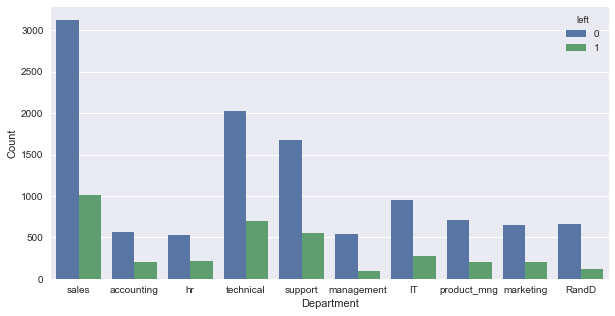

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='sales',data = hr_stats, hue='left')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# The Potential Solution:  Promotion

In order to decrease employee churn, the company needs to improve on two measures:  1) they need to keep a greater number of employees from leaving the company; and 2) they need to get employees to spend more years working at the company.  When examining the differences between the employees that left the company and the employees that did not leave the company, one observation that is relevant to developing a solution to employee turnover is that the average satisfaction level of those who leave is significantly lower than those who do not leave the company.  This might seem logical, but the key to developing a solution to the problem is understanding why those employees who leave are less satisfied.  Another releveant observation is that the average satisfaction level of employees decreases after two years, three years, and four years before dramatically increasing and leveling out.  The data above suggests several potential reasons to explain these differences in average satisfaction level including salary level and promotion rate, but, for the purposes of this RFC, we will be focusing on the average number of hours the employees work in a month, and the hypothesis is that by implementing and enforcing a policy of working 200 hours per month the rate of employee turnover will decrease.  

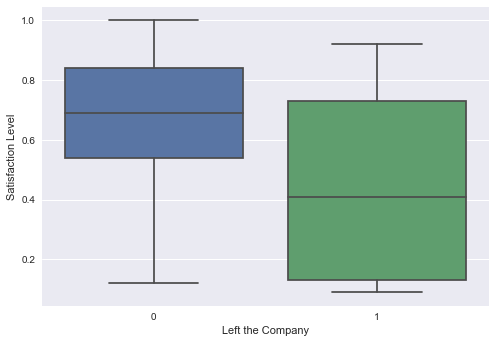

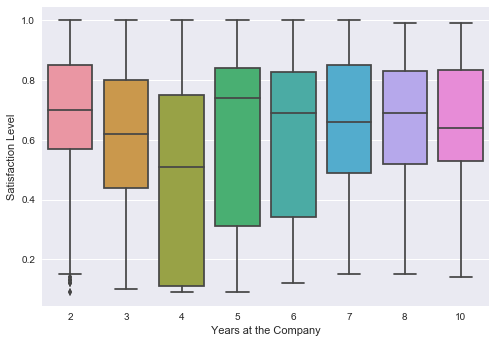

In [30]:
#Examining the relationship between satisfaction level and whether or not the employee left
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Satisfaction Level')
plt.show()

sns.boxplot(x='time_spend_company', y='satisfaction_level', data=hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Satisfaction Level')
plt.show()

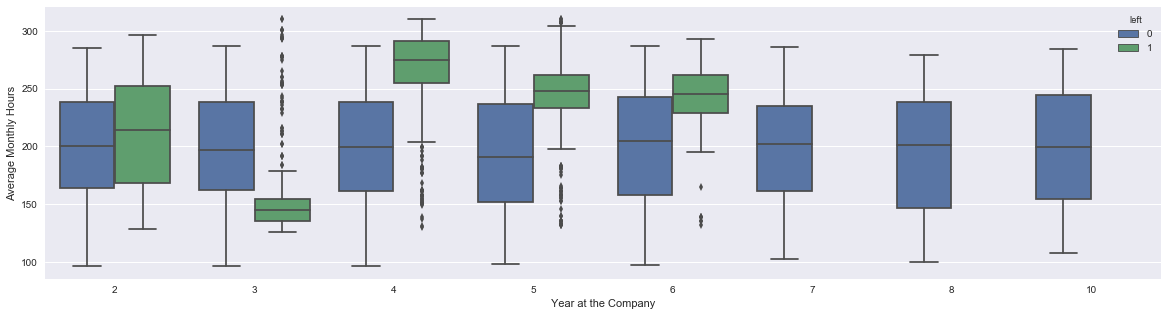

In [39]:
#Examining the relationship between average monthly hours and the number or years spent at the companyand breaking
#it down further into two groups: those who left and those who stayed with the company
plt.figure(figsize=(20, 5))
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=hr_stats, hue='left')
plt.xlabel('Year at the Company')
plt.ylabel('Average Monthly Hours')
plt.show()

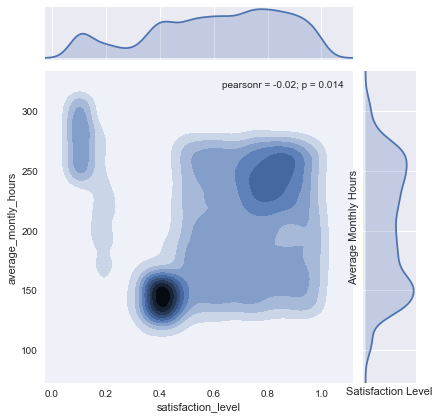

In [31]:
#Showing the bivariate distribution of satisfaction level and average monthly hours worked
sns.jointplot(x='satisfaction_level', y='average_montly_hours', data=hr_stats, kind='kde')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()

# The Method of Testing the Solution:

Experiment:



Key Metrics:

The key metric to determine whether or not the hypothesis is correct is employee churn rate for the control group and the test group.  If the hypothesis is correct the employee churn rate for the test group should decrease while the employee churn rate for the control group should remain the same.  This would occur because the number of employees who leave the test group will have decreased compared to the control group. 

Other Metrics:



Further Research:


In [36]:
hr_stats.groupby(['left'] & ['time_spend_company'])['average_montly_hours'].mean())

SyntaxError: invalid syntax (<ipython-input-36-cbd945830212>, line 1)

In [38]:
blah = hr_stats.groupby('left')
blah.groupby('time_spend_company')['average_montly_hours'].mean()

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method